In [1205]:
# --------------------------------------------
# Blame : Raghul Ranganathan J
# Assignment : Linear Regression
# Description : to build a Multiple Linear Regression Model for Bike Rental Company
# Language : Python3
# Version: 0.1
# Start Date : 26th Jan 2021
# End Date : 1st Feb 2021
# ----------------------------------------------

### Problem Statement

   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


   A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing **Corona pandemic**. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


   In such an attempt,  **BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


   They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   1. Which variables are significant in predicting the demand for shared bikes.
   2. How well those variables describe the bike demands

   Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Project Motive
    The motive is to build a multiple linear regression model for the prediction of demand for shared bikes

### Business Goal:
   You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##### Dataset Characteristics

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - Clear, Few clouds, Partly cloudy, Partly cloudy
    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### POINTS TO REMEMBER

- **'casual'** column indicates the number casual users who have made a rental.
- **'registered'** on the other hand shows the total number of registered users who have made a booking on a given day.
- **'cnt'** variable indicates the total number of bike rentals, including both casual and registered and it act as the **Target Variable**
- **'yr'** with two values 0 and 1 indicating the years 2018 and 2019 respectively

#### Checklist for Data Preparation
- Convert variables like **'weathersit'** and **'season'** as a categorical variable rather than maintaining it as a numerical value
- As the demand for the bike increases year by year and thus the column **'yr'** might be a good variable for prediction

## Steps to proceed with the creating a model for the Bike Sharing
- **Proceed with EDA to know about data**
    - Data understanding
    - Data cleaning (cleaning missing values, removing redundant columns etc.)
    - Data Analysis
- **Visualize the data for better understanding**
- **Data Preparation**
- **Splitting the Data into Training and Testing Sets**
- **Building a multiple linear model**
- **Residual Analysis**
- **Infer Predictions Using the Final Model**

### STEP: 1 EDA for Reading and Understanding the Data

Let us first import NumPy and Pandas libraries and read the biking dataset

In [1206]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1207]:
# Loading Libraries

import numpy as np
import pandas as pd

In [1208]:
# Import the data from csv file

df_bike_rental =  pd.read_csv("day.csv", index_col = 0)

###### Get some basic idea regarding the data frame
- **head()** - to have an insight on data first few data rows

In [1209]:
df_bike_rental.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822


Let's know about all the columns name and get an understanding with Dataset Characteristics

In [1210]:
## List of columns available in data frame

df_bike_rental.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [1211]:
### Rename columns for better readablity

df_bike_rental.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count', 'dteday': 'date_day'}, inplace = True) 
df_bike_rental.head()

,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1212]:
## List of columns available in data frame after rename

df_bike_rental.columns

Index(['date_day', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

**shape** - To know about dimensionality of the DataFrame

In [1213]:
df_bike_rental.shape

(730, 15)

**info()** - to know about null columns which helps to remove the columns or rows

In [1214]:
df_bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_day    730 non-null    object 
 1   season      730 non-null    int64  
 2   year        730 non-null    int64  
 3   month       730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  count       730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


As we can see from above result is there is no null values but we can also confirm it with alternate way

In [1215]:
## To verify again that there is no null data

nullCount = df_bike_rental.isnull().sum()
print(nullCount)

date_day      0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


**describe()** - to get an statistical insights about the numerical columns

In [1216]:
## to know about std, mean, count, etc.

df_bike_rental.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can infer following details about the column from the dataset
- **dteday** - the column explains the date, month and year and **yr** has the same
- **cnt** - being our target variable and it is the combination of **causal** and **registered**

Also we are going to concentrate only on years which makes **dteday** column un-neccessary as we have **yr** column

In [1217]:
## Drop Column

## dteday
df_bike_rental.drop('date_day', axis =1, inplace=True)

## casual and registered
df_bike_rental.drop(['casual','registered'],axis=1,inplace=True)

In [1218]:
df_bike_rental.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
7,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
8,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
9,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822


We need to do some transformation as per our checklist
- We need to convert categorical values to numerical values and vice versa for better understanding

Column - season

The column contains values only 1,2,3,4 which are the 4 season and as per our data characteristics understanding

- 1 - **spring**, 
- 2 - **summer**, 
- 3 - **fall**,  
- 4 - **winter**, 

In [1219]:
## Replace the season numerical value to categorical 

df_bike_rental['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df_bike_rental.head(10)


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
instant,,,,,,,,,,,,
1,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
6,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
7,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
8,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
9,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822


Column - weathersit

The column contains values only 1,2,3,4 which are the 4 combination of weathers and as per our data characteristics understanding

- 1: **Clear, Few clouds, Partly cloudy, Partly cloudy**
- 2: **Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**
- 3: **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**
- 4: **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**

In [1220]:
## Replace the ## Replace the season numerical value to categorical  numerical value to categorical 

df_bike_rental['weathersit'].replace({1:"Clear_Few Clouds_Partly Cloudy",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm_Scattered Clouds",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist_Snow_Fog'},inplace=True)
df_bike_rental.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
instant,,,,,,,,,,,,
1,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,1,0,1,1,Clear_Few Clouds_Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,1,0,2,1,Clear_Few Clouds_Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,1,0,3,1,Clear_Few Clouds_Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
6,spring,0,1,0,4,1,Clear_Few Clouds_Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
7,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
8,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
9,spring,0,1,0,0,0,Clear_Few Clouds_Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822


Column - weekday

The column contains values only 0,1,2,3,4,5,6 which are the days of the week as per our data characteristics understanding

- 0: **Sunday**
- 1: **Monday**
- 2: **Tuesday**
- 3: **Wednesday**
- 4: **Thursday**
- 5: **Friday**
- 6: **Saturday**

In [1221]:

df_bike_rental['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df_bike_rental.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
instant,,,,,,,,,,,,
1,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,1,0,Monday,1,Clear_Few Clouds_Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,1,0,Tuesday,1,Clear_Few Clouds_Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,1,0,Wednesday,1,Clear_Few Clouds_Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
6,spring,0,1,0,Thursday,1,Clear_Few Clouds_Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
7,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
8,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
9,spring,0,1,0,Sunday,0,Clear_Few Clouds_Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822


Column - month

The column contains values only 0 to 12 which are the month as per our data characteristics understanding

In [1222]:
df_bike_rental['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df_bike_rental.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
instant,,,,,,,,,,,,
1,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Monday,1,Clear_Few Clouds_Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds_Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
6,spring,0,Jan,0,Thursday,1,Clear_Few Clouds_Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
7,spring,0,Jan,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
8,spring,0,Jan,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
9,spring,0,Jan,0,Sunday,0,Clear_Few Clouds_Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822


In [1223]:
## Let's have info about the datasets

df_bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


### STEP 2: Visualizing the Data

Let's understand about the data and this helps to know about the multicollinearity in columns

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualize our data using **matplotlib** and **seaborn**.

In [1224]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1225]:
# Sort the data based on the unique values

df_bike_rental.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
windspeed     649
atemp         689
count         695
dtype: int64

##### Visualizing the Numerical Variables
Now Let's start with numerical variables available in columns

And let's have our visualization simple enough

- We can ignore columns like `year, month, holiday, weekday, workingday` as these are related to the time
- We can ignore `casual` and `registered` as we those data in `cnt`

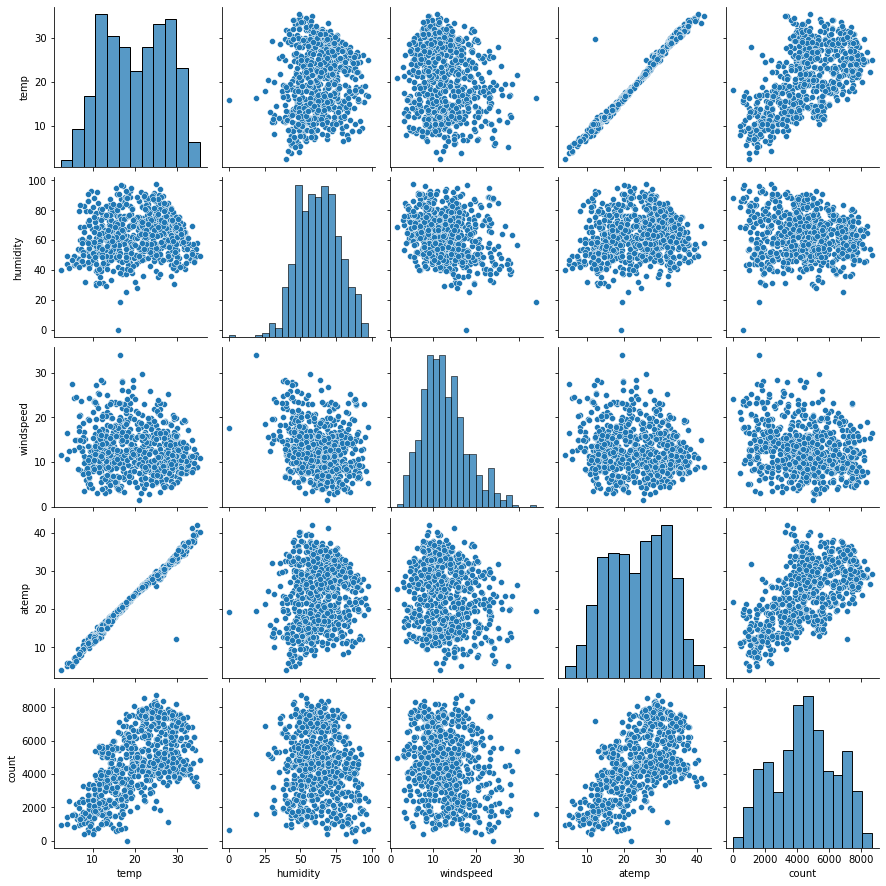

In [1226]:
## Plot to understand numerical column

## Let's convert the data to INT just in case if we have stringy data
df_bike_rental[['temp','humidity','windspeed','atemp', 'count']]=df_bike_rental[['temp','humidity','windspeed','atemp', 'count']].apply(pd.to_numeric)

sns.pairplot(df_bike_rental, vars=['temp','humidity','windspeed','atemp', 'count'])
plt.show()

##### Inferences
We got a pretty good visualization 
- As we can see is the column atemp and temp have a strong relationship

In [1227]:
## Droping one of the columns

df_bike_rental.drop(['temp'],axis=1,inplace=True)
df_bike_rental.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
instant,,,,,,,,,,,
1,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Monday,1,Clear_Few Clouds_Partly Cloudy,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds_Partly Cloudy,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly Cloudy,11.46350,43.6957,12.522300,1600


##### Visualizing the Categorical Variables

We have already converted few columns to categorical and let's create boxplot for those

The column which we can use are
- season
- weathersit
- weekday
- holiday
- month
- yearr
- workingday

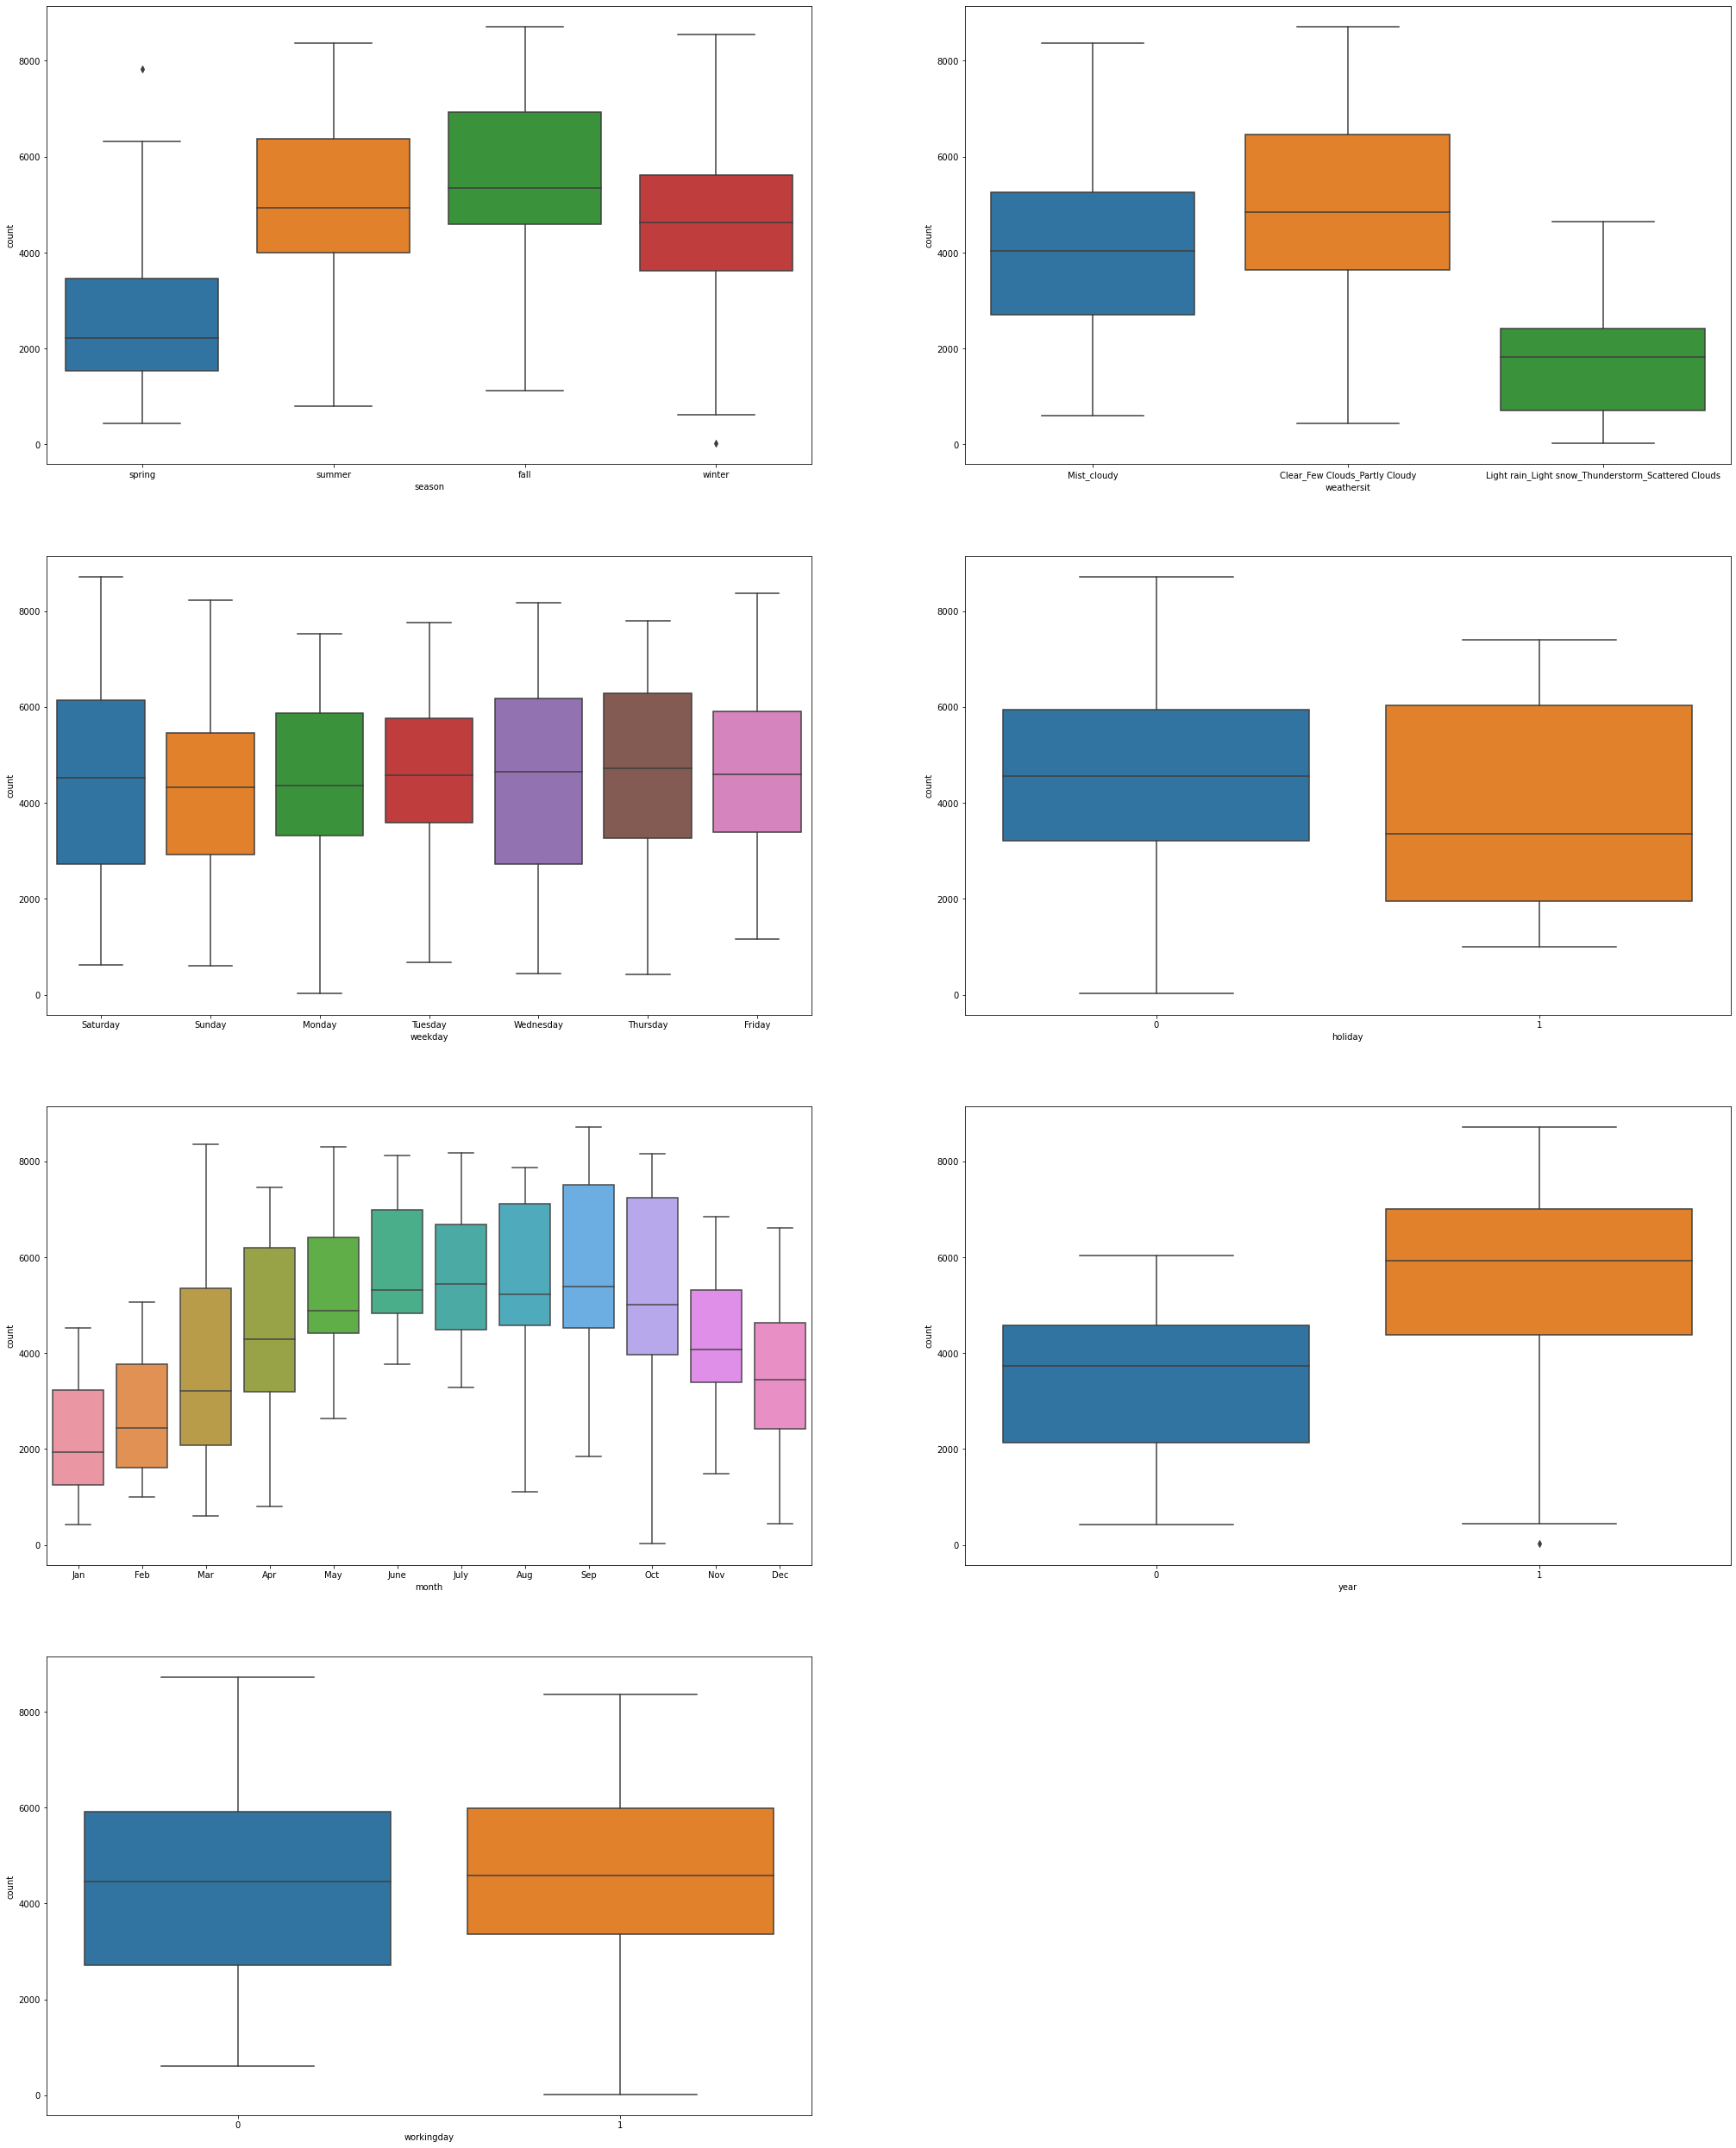

In [1228]:
## BoxPlot

## Resize the figure and arrange in grid
plt.figure(figsize=(35, 45))

# Season
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'count', data = df_bike_rental)

# Weather
plt.subplot(4,2,2)
sns.boxplot(x = 'weathersit', y = 'count', data = df_bike_rental)
        
# Weekday
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'count', data = df_bike_rental)

# Holiday
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'count', data = df_bike_rental)

            
# Month
plt.subplot(4,2,5)
sns.boxplot(x = 'month', y = 'count', data = df_bike_rental)
            
# Year
plt.subplot(4,2,6)
sns.boxplot(x = 'year', y = 'count', data = df_bike_rental)

# Workingday
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'count', data = df_bike_rental)


plt.show()

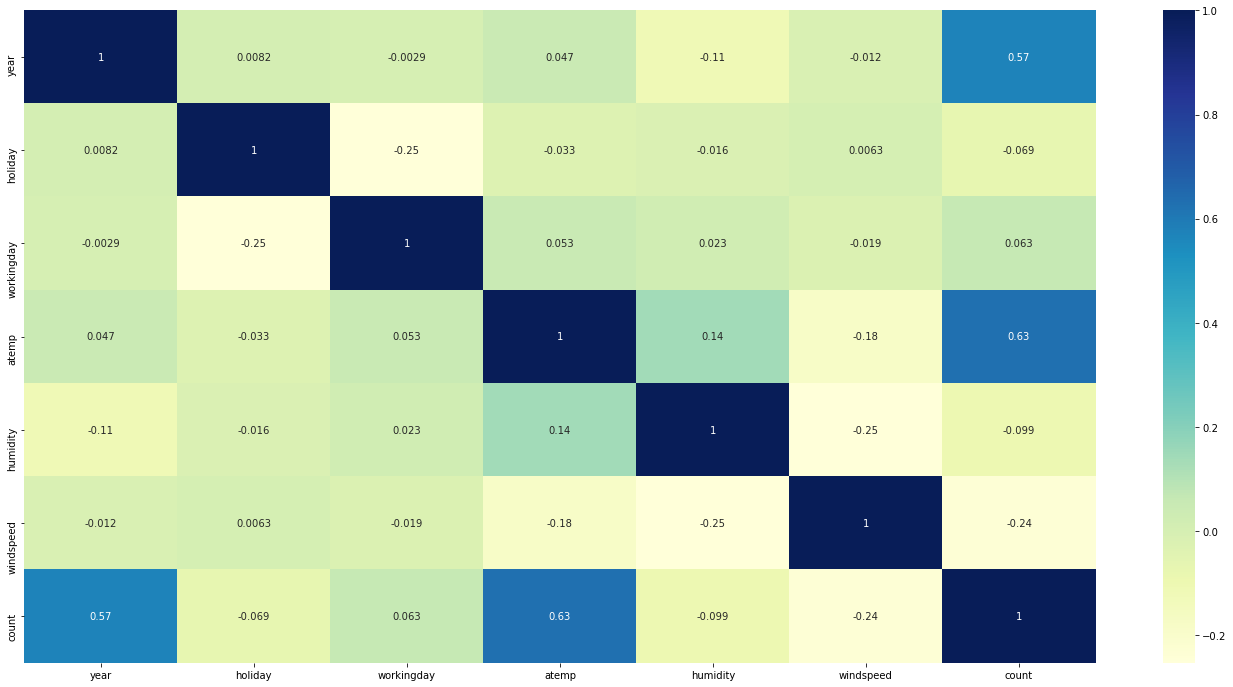

In [1229]:
## Correlation

plt.figure(figsize = (24, 12))
sns.heatmap(df_bike_rental.corr(), annot = True, cmap="YlGnBu")
plt.show()


## Step 3: Data Preparation

We already converted some values to meaningful values and now we can subsitute those value with dummy variable and prepare our data for training and testing

#### Dummy Variables

We have few variable in categorical type which has more than three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [1230]:
## Creating dummy Variables

## Seasons Type which has 4 levels and we can drop first column
Seasonal_condition = pd.get_dummies(df_bike_rental['season'], drop_first=True)
Seasonal_condition.head()

,spring,summer,winter
instant,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [1231]:
## Creating dummy Variables
## Weather Type which has 4 levels and we can drop first column

Weather_condition = pd.get_dummies(df_bike_rental['weathersit'], drop_first=True)
Weather_condition.head()

,Light rain_Light snow_Thunderstorm_Scattered Clouds,Mist_cloudy
instant,,
1,0,1
2,0,1
3,0,0
4,0,0
5,0,0


In [1232]:
## Creating dummy Variables
## Day of the Week Type which has 7 levels and we can drop first column

Day_of_week = pd.get_dummies(df_bike_rental['weekday'], drop_first=True)
Day_of_week.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
instant,,,,,,
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [1233]:
## Creating dummy Variables
## Month of the year which has 7 levels and we can drop first column

Month = pd.get_dummies(df_bike_rental['month'], drop_first=True)
Month.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0


In [1234]:
# Now let's add the dummy variable to original data frame

# Season
df_bike_rental = pd.concat([df_bike_rental, Seasonal_condition], axis=1)
# Weather
df_bike_rental = pd.concat([df_bike_rental, Weather_condition], axis=1)
# Day
df_bike_rental = pd.concat([df_bike_rental, Day_of_week], axis=1)
# Month
df_bike_rental = pd.concat([df_bike_rental, Month], axis=1)

df_bike_rental.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Monday,1,Clear_Few Clouds_Partly Cloudy,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds_Partly Cloudy,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
5,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds_Partly Cloudy,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [1235]:
## Delete the columns which we had the actual values

df_bike_rental.drop('season', axis=1, inplace=True)

df_bike_rental.drop('weathersit', axis=1, inplace=True)

df_bike_rental.drop('weekday', axis=1, inplace=True)

df_bike_rental.drop('month', axis=1, inplace=True)

In [1236]:
df_bike_rental.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [1237]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df_bike_rental, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1238]:
## Check training data

df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
577,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
729,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1239]:
## Check testing data

df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
536,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
300,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
222,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Rescaling the Features 

For rescaling let's proceed with the MinMax scaling

In [1240]:
from sklearn.preprocessing import MinMaxScaler

In [1241]:
scaler = MinMaxScaler()

In [1242]:
# Apply scaler() to all the columns except the 'dummy' variables

num_vars = ['atemp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1243]:
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
577,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
729,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
483,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1244]:
df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


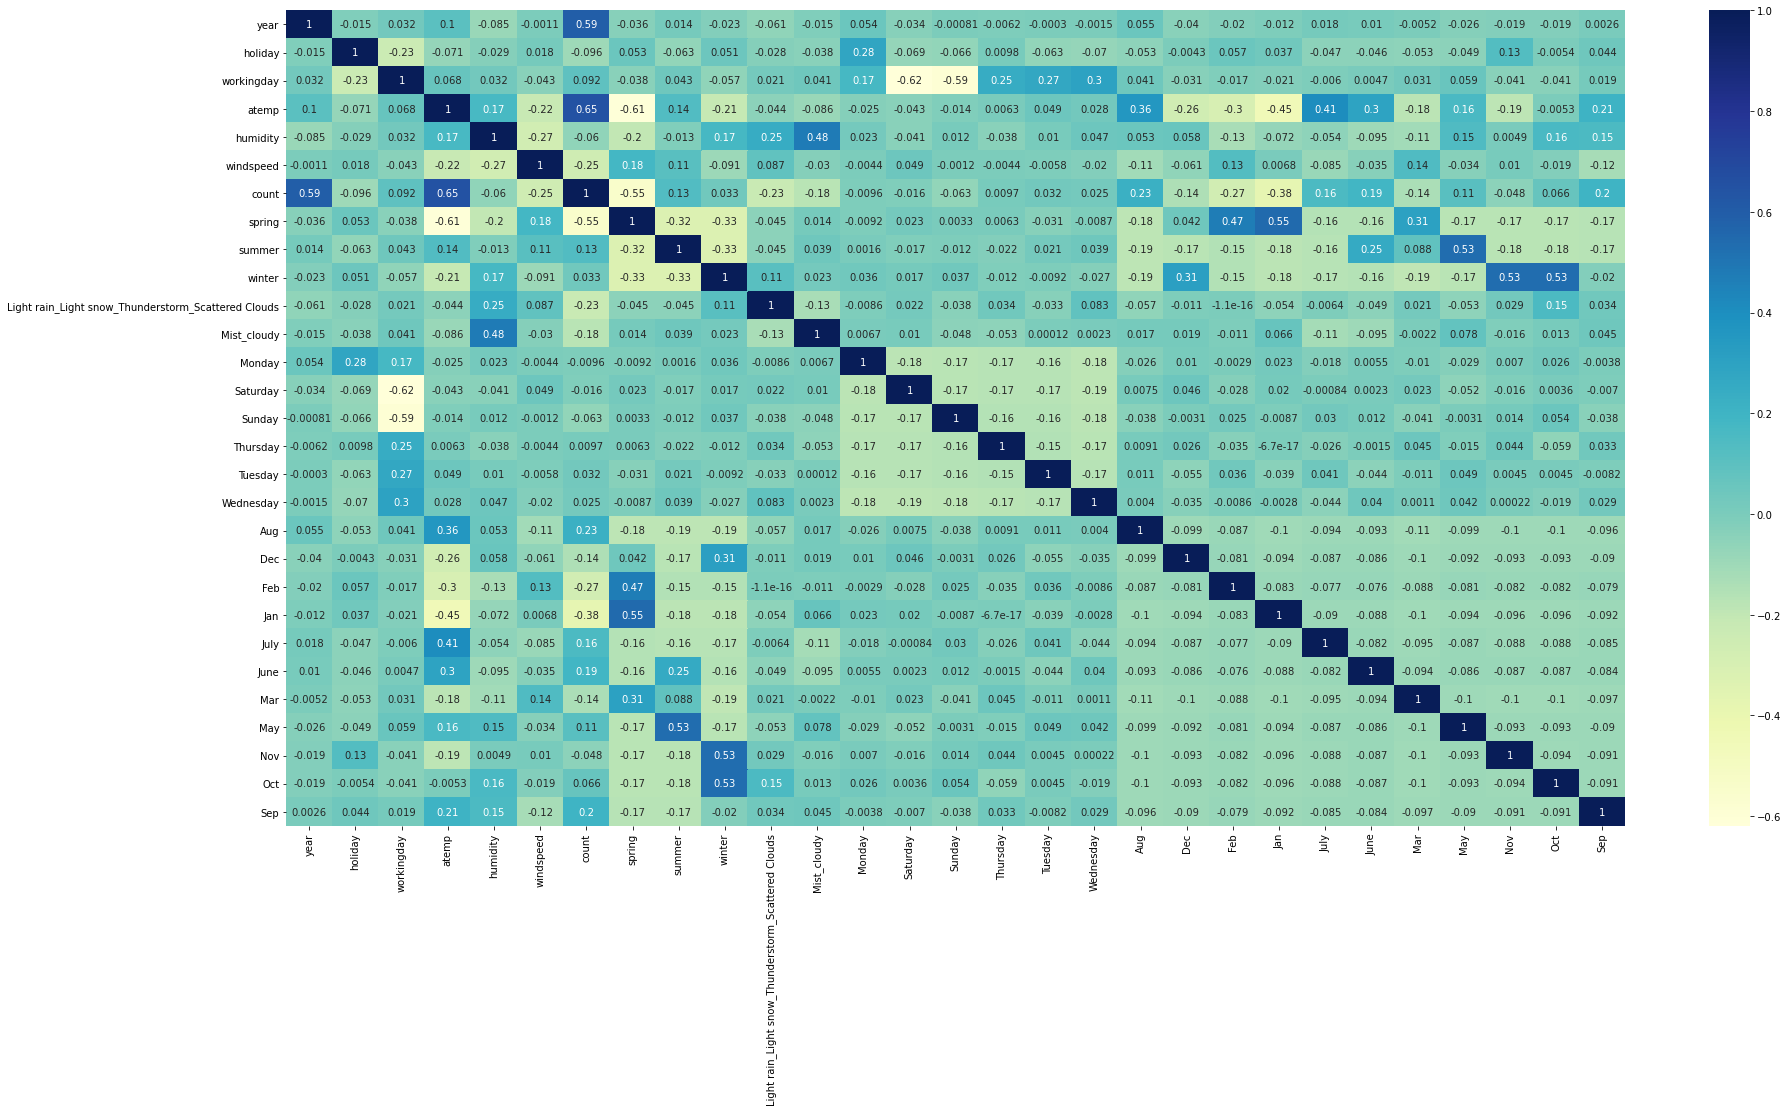

In [1247]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1292]:
## Define X and y values

y_train = df_train.pop('count')
X_train = df_train

KeyError: 'count'

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [1293]:
## Let's use REFE for feature Selecton

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1294]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [1295]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm_Scattered Clouds', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [1296]:
# List of columns where RFE support is True

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'spring', 'winter',
       'Light rain_Light snow_Thunderstorm_Scattered Clouds', 'Mist_cloudy',
       'Saturday', 'Dec', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

In [1297]:
# List of columns where RFE support is False

X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct'],
      dtype='object')

In [1298]:
X_train_rfe = X_train[col]

### Step 5: Building a linear model
Fit a regression line through the training data using statsmodels

In [1299]:
import statsmodels.api as sm

# Add a constant

X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model

lm = sm.OLS(y_train,X_train_rfe).fit()

In [1300]:
# Check the parameters obtained

lr.params

const                                                  0.366172
year                                                   0.232598
holiday                                               -0.084117
atemp                                                  0.446979
humidity                                              -0.147689
windspeed                                             -0.169162
spring                                                -0.106986
winter                                                 0.066155
Light rain_Light snow_Thunderstorm_Scattered Clouds   -0.250410
Mist_cloudy                                           -0.058230
Saturday                                               0.018187
Dec                                                   -0.048480
Jan                                                   -0.051525
July                                                  -0.067871
Nov                                                   -0.050182
Sep                                     

In [1301]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.67e-187
Time:                        23:26:48   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.3662      0.032     11.425      0.000       0.303       0.429
year                                                    0.2326      0.008     28.490      0.000       0.217       0.249
holiday                                                -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp                                                   0.4470      0.035     12.826      0.000       0.379       0.515
humidity                                               -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed                                              -0.1692      0.026     -6.498      0.000      -0.220      -0.118
spring                                                 -0.1070      0.015     -6.974      0.000      -0.137      -0.077
winter                                                  0.0662      0.014      4.703      0.000       0.039       0.094
Light rain_Light snow_Thunderstorm_Scattered Clouds    -0.2504      0.027     -9.381      0.000      -0.303      -0.198
Mist_cloudy                                            -0.0582      0.011     -5.501      0.000      -0.079      -0.037
Saturday                                                0.0182      0.011      1.627      0.104      -0.004       0.040
Dec                                                    -0.0485      0.017     -2.791      0.005      -0.083      -0.014
Jan                                                    -0.0515      0.018     -2.836      0.005      -0.087      -0.016
July                                                   -0.0679      0.017     -3.935      0.000      -0.102      -0.034
Nov                                                    -0.0502      0.019     -2.689      0.007      -0.087      -0.014
Sep                                                     0.0586      0.016      3.751      0.000       0.028       0.089
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1302]:
# Let know about VIF 

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.08
2,atemp,16.88
4,windspeed,4.03
6,winter,2.93
5,spring,2.89
8,Mist_cloudy,2.26
0,year,2.06
13,Nov,1.82
11,Jan,1.75
10,Dec,1.54


In [1303]:
## Droping Jan due to both p-value and low VF

X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [1304]:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.70e-186
Time:                        23:26:48   Log-Likelihood:                 504.72
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     495   BIC:                            -915.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [1305]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.70e-186
Time:                        23:26:48   Log-Likelihood:                 504.72
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     495   BIC:                            -915.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.3498      0.032     11.017      0.000       0.287       0.412
year                                                    0.2316      0.008     28.194      0.000       0.215       0.248
holiday                                                -0.0854      0.026     -3.269      0.001      -0.137      -0.034
atemp                                                   0.4766      0.033     14.233      0.000       0.411       0.542
humidity                                               -0.1557      0.038     -4.067      0.000      -0.231      -0.081
windspeed                                              -0.1584      0.026     -6.106      0.000      -0.209      -0.107
spring                                                 -0.1177      0.015     -7.861      0.000      -0.147      -0.088
winter                                                  0.0676      0.014      4.774      0.000       0.040       0.095
Light rain_Light snow_Thunderstorm_Scattered Clouds    -0.2451      0.027     -9.141      0.000      -0.298      -0.192
Mist_cloudy                                            -0.0579      0.011     -5.432      0.000      -0.079      -0.037
Saturday                                                0.0175      0.011      1.558      0.120      -0.005       0.040
Dec                                                    -0.0369      0.017     -2.169      0.031      -0.070      -0.003
July                                                   -0.0730      0.017     -4.226      0.000      -0.107      -0.039
Nov                                                    -0.0445      0.019     -2.383      0.018      -0.081      -0.008
Sep                                                     0.0585      0.016      3.720      0.000       0.028       0.089
==============================================================================
Omnibus:                       69.769   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.872
Skew:                          -0.681   Prob(JB):                     7.17e-41
Kurtosis:                       5.616   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1306]:

X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [1307]:

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,23.66
2,atemp,15.87
4,windspeed,4.01
6,winter,2.93
5,spring,2.51
8,Mist_cloudy,2.26
0,year,2.06
12,Nov,1.81
10,Dec,1.47
11,July,1.39


As we can `hum`, `atemp` has more VIF we can remove them but we have do it one by one that will maintain the stablity of model

In [1308]:
# Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [1309]:
# Let's do regression again

X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [1310]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          8.61e-184
Time:                        23:26:49   Log-Likelihood:                 496.34
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     496   BIC:                            -905.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2675      0.025     10.766      0.000       0.219       0.316
year                                                    0.2353      0.008     28.376      0.000       0.219       0.252
holiday                                                -0.0862      0.027     -3.249      0.001      -0.138      -0.034
atemp                                                   0.4433      0.033     13.443      0.000       0.378       0.508
windspeed                                              -0.1307      0.025     -5.141      0.000      -0.181      -0.081
spring                                                 -0.1216      0.015     -8.013      0.000      -0.151      -0.092
winter                                                  0.0588      0.014      4.137      0.000       0.031       0.087
Light rain_Light snow_Thunderstorm_Scattered Clouds    -0.2884      0.025    -11.533      0.000      -0.338      -0.239
Mist_cloudy                                            -0.0829      0.009     -9.379      0.000      -0.100      -0.066
Saturday                                                0.0200      0.011      1.748      0.081      -0.002       0.042
Dec                                                    -0.0416      0.017     -2.415      0.016      -0.075      -0.008
July                                                   -0.0655      0.017     -3.756      0.000      -0.100      -0.031
Nov                                                    -0.0434      0.019     -2.285      0.023      -0.081      -0.006
Sep                                                     0.0551      0.016      3.455      0.001       0.024       0.086
==============================================================================
Omnibus:                       74.097   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.162
Skew:                          -0.730   Prob(JB):                     1.87e-42
Kurtosis:                       5.629   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1311]:

X_train_lm2=X_train_lm2.drop(['const'],axis=1)

Re-iterating VIF for out lr1

In [1312]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.58
3,windspeed,3.98
5,winter,2.53
0,year,2.05
11,Nov,1.79
4,spring,1.69
7,Mist_cloudy,1.52
9,Dec,1.42
10,July,1.35
12,Sep,1.21


Now we can see `atemp` has high VIF than the others so we can proceed with dropping it

In [1313]:
## Drop holiday variable


X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [1314]:
# Let's re-iterate regression results again

X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()

In [1315]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.07e-182
Time:                        23:26:49   Log-Likelihood:                 490.97
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     497   BIC:                            -900.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2662      0.025     10.614      0.000       0.217       0.315
year                                                    0.2356      0.008     28.155      0.000       0.219       0.252
atemp                                                   0.4432      0.033     13.313      0.000       0.378       0.509
windspeed                                              -0.1318      0.026     -5.139      0.000      -0.182      -0.081
spring                                                 -0.1244      0.015     -8.132      0.000      -0.154      -0.094
winter                                                  0.0587      0.014      4.091      0.000       0.030       0.087
Light rain_Light snow_Thunderstorm_Scattered Clouds    -0.2853      0.025    -11.312      0.000      -0.335      -0.236
Mist_cloudy                                            -0.0816      0.009     -9.151      0.000      -0.099      -0.064
Saturday                                                0.0225      0.011      1.961      0.050   -4.19e-05       0.045
Dec                                                    -0.0423      0.017     -2.433      0.015      -0.076      -0.008
July                                                   -0.0647      0.018     -3.676      0.000      -0.099      -0.030
Nov                                                    -0.0505      0.019     -2.653      0.008      -0.088      -0.013
Sep                                                     0.0513      0.016      3.194      0.001       0.020       0.083
==============================================================================
Omnibus:                       83.745   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.818
Skew:                          -0.806   Prob(JB):                     5.59e-50
Kurtosis:                       5.841   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1316]:
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

Re-iterating VIF for out lr2

In [1317]:
## using the same code used above

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.57
2,windspeed,3.98
4,winter,2.53
0,year,2.05
10,Nov,1.77
3,spring,1.67
6,Mist_cloudy,1.51
8,Dec,1.42
9,July,1.35
11,Sep,1.21


Now we can see `windspeed` has low VIF and p-value

In [1318]:
# Dropping windspeed

X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [1319]:
# Let's re-iterate regression results again

X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()


In [1320]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.66e-178
Time:                        23:26:49   Log-Likelihood:                 477.77
No. Observations:                 510   AIC:                            -931.5
Df Residuals:                     498   BIC:                            -880.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2068      0.023      9.063      0.000       0.162       0.252
year                                                    0.2345      0.009     27.341      0.000       0.218       0.251
atemp                                                   0.4707      0.034     13.974      0.000       0.405       0.537
spring                                                 -0.1224      0.016     -7.809      0.000      -0.153      -0.092
winter                                                  0.0668      0.015      4.568      0.000       0.038       0.095
Light rain_Light snow_Thunderstorm_Scattered Clouds    -0.2971      0.026    -11.537      0.000      -0.348      -0.247
Mist_cloudy                                            -0.0800      0.009     -8.751      0.000      -0.098      -0.062
Saturday                                                0.0198      0.012      1.682      0.093      -0.003       0.043
Dec                                                    -0.0353      0.018     -1.989      0.047      -0.070      -0.000
July                                                   -0.0623      0.018     -3.453      0.001      -0.098      -0.027
Nov                                                    -0.0519      0.020     -2.661      0.008      -0.090      -0.014
Sep                                                     0.0584      0.016      3.565      0.000       0.026       0.091
==============================================================================
Omnibus:                       86.353   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.426
Skew:                          -0.815   Prob(JB):                     5.09e-54
Kurtosis:                       5.983   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1321]:
## Dropping const

X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [1322]:
## using the same code used above

vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,3.08
3,winter,2.51
0,year,2.04
9,Nov,1.75
5,Mist_cloudy,1.51
7,Dec,1.42
8,July,1.33
2,spring,1.30
10,Sep,1.20
6,Saturday,1.18


In [1323]:
## Dropping July since the high VIF and negative correlation with count

X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [1324]:
# Let's re-iterate regression results again

X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()


In [1325]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.14e-177
Time:                        23:26:49   Log-Likelihood:                 471.73
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     499   BIC:                            -874.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2217      0.023      9.788      0.000       0.177       0.266
year                                                    0.2355      0.009     27.172      0.000       0.218       0.253
atemp                                                   0.4305      0.032     13.473      0.000       0.368       0.493
spring                                                 -0.1266      0.016     -8.011      0.000      -0.158      -0.096
winter                                                  0.0696      0.015      4.718      0.000       0.041       0.099
Light rain_Light snow_Thunderstorm_Scattered Clouds    -0.2995      0.026    -11.509      0.000      -0.351      -0.248
Mist_cloudy                                            -0.0778      0.009     -8.447      0.000      -0.096      -0.060
Saturday                                                0.0190      0.012      1.601      0.110      -0.004       0.042
Dec                                                    -0.0387      0.018     -2.157      0.031      -0.074      -0.003
Nov                                                    -0.0551      0.020     -2.797      0.005      -0.094      -0.016
Sep                                                     0.0684      0.016      4.189      0.000       0.036       0.100
==============================================================================
Omnibus:                       89.003   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.259
Skew:                          -0.840   Prob(JB):                     1.67e-55
Kurtosis:                       6.008   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1326]:
## Dropping const

X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [1327]:
## using the same code used above

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,2.48
3,winter,2.46
0,year,2.03
8,Nov,1.75
5,Mist_cloudy,1.49
7,Dec,1.42
2,spring,1.28
6,Saturday,1.18
9,Sep,1.16
4,Light rain_Light snow_Thunderstorm_Scattered C...,1.07


### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Let's Predict values for model 10

In [1331]:
y_train_cnt = lm5.predict(X_train_lm5)

In [1332]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1333]:
# Calculating Residuals

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

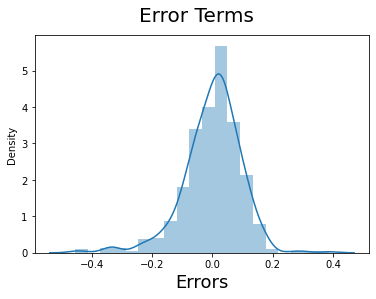

In [1334]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1336]:
# List columns availble in this model

X_train_lm5.columns

Index(['const', 'year', 'atemp', 'spring', 'winter',
       'Light rain_Light snow_Thunderstorm_Scattered Clouds', 'Mist_cloudy',
       'Saturday', 'Dec', 'Nov', 'Sep'],
      dtype='object')

In [1337]:
X_train_lm5.shape

(510, 11)

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [1338]:
## Let's do the scaling to the test data

num_vars=['atemp','humidity','windspeed','count']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,count,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.778767,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,1,0,0,0,0,0,0
536,1,0,1,0.855132,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,1,0,0,0,0,0
300,0,0,1,0.492359,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,0,0,0,1,0
222,0,0,1,0.805661,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,1,0.749249,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1340]:
## Adding x and y sets

y_test = df_test.pop('count')
X_test = df_test

In [1341]:
X_train_final = X_train_lm5.drop(['const'], axis=1)

In [1342]:
# Let's predict the test data using the model

X_test_final = X_test[X_train_final.columns]

In [1343]:
# Add constant to the test

X_test_final = sm.add_constant(X_test_final)

In [1344]:
## Add prediction to the models

y_pred = lm5.predict(X_test_final)


### Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

### The main goal is find the R-squared and MSE

In [1345]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1346]:
# Find the R square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8168803976800818

In [1347]:
# Adjusted R^2
# Adjusted r2=1-(1-R2)*(n-1)/(n-p-1)

Adj_r2=1-(1-0.8029017439604784)*(14-1)/(14-1-1)
Adj_r2

0.7864768892905183

Text(0, 0.5, 'y_pred')

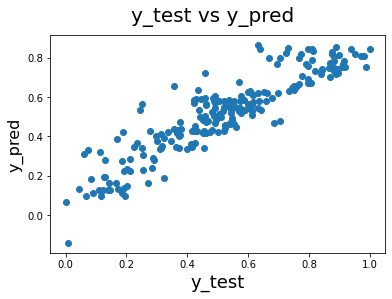

In [1348]:
## Comparison of y_pred vs y_test

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

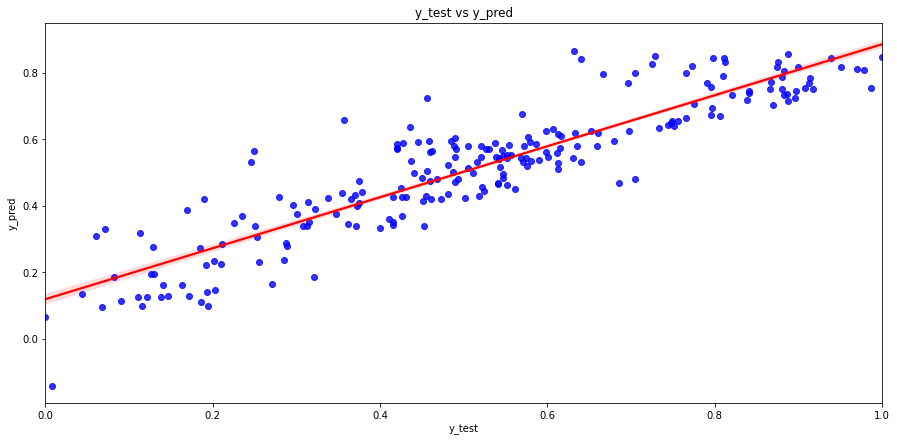

In [1349]:
# Regression plot

plt.figure(figsize=(15,7))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')                         # Y-label
plt.show()

- Train R^2 : 0.826
- Train Adjusted R^2 : 0.82
- Test R^2: 0.817
- Test Adjusted R^2: 0.786
- Difference in R^2 between train and test: 1.01%
- Difference in Adjusted R^2 between train and test: 3%

- Thus the temperature variable is having the highest coefficient 0.4914, which means if the temperature increases the number of bike rentals increases by 0.4914 for each units.
- Dependent Variable - spring, mist cloudy , light snow variables with negative 

- The spring season has negative co-efficient and its negatively correlated
- The bike rental should focus more on Summer and Winter
- Though 2018 to 2019 there is increase in demand due to corona there will be a drop in count of users
- Temperature will be a major constraint and also as a deciding factor